In [14]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")


import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image

In [57]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))



In [7]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [8]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.3467 - loss: 1.7592 - val_accuracy: 0.5319 - val_loss: 1.3249
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.5627 - loss: 1.2222 - val_accuracy: 0.6060 - val_loss: 1.1132
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.6234 - loss: 1.0584 - val_accuracy: 0.6461 - val_loss: 1.0015
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.6647 - loss: 0.9448 - val_accuracy: 0.6528 - val_loss: 1.0022
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.6942 - loss: 0.8757 - val_accuracy: 0.6818 - val_loss: 0.9236
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7133 - loss: 0.8120 - val_accuracy: 0.6680 - val_loss: 0.9553
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7305 - loss: 0.7562 - val_accuracy: 0.6967 - val_loss: 0.8805
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7454 -

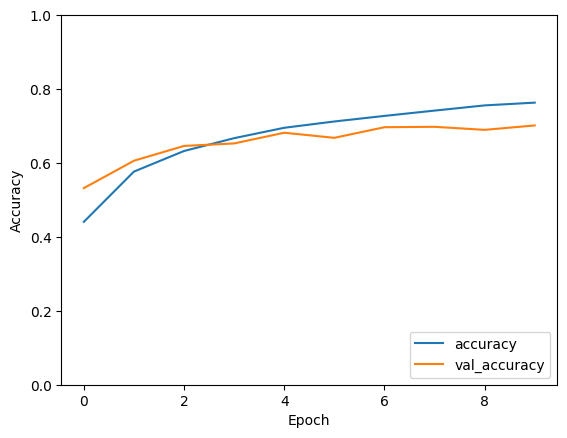

In [29]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc="lower right")

In [49]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

313/313 - 3s - 10ms/step - accuracy: 0.7015 - loss: 0.8778
Test accuracy: 0.70


In [51]:
model.save("cifar10_model.h5")

In [52]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [53]:
# Load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(32, 32)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image to [0, 1] range
    return img_array


img_path = "image2.jpg"
img_array = load_and_preprocess_image(img_path)

In [54]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


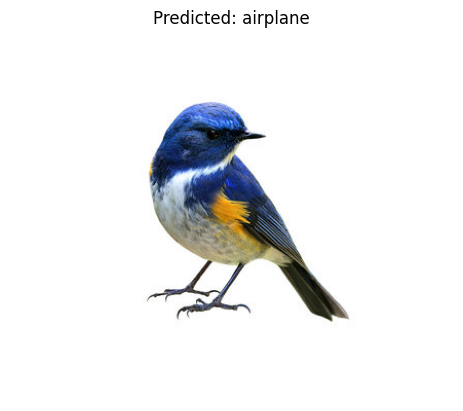

The image is predicted to be a: airplane


In [59]:
model = tf.keras.models.load_model("cifar10_model.h5")

# Add softmax layer for prediction
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

# Define the class names
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]


# Function to load and preprocess an external image
def load_and_preprocess_image(img_path, target_size=(32, 32)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image to [0, 1] range
    return img_array


# Function to predict and display a single image
def predict_and_display_image(img_path):
    img_array = load_and_preprocess_image(img_path)

    # Predict the class of the image
    predictions = probability_model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    predicted_label = class_names[predicted_class]

    # Display the image and prediction
    plt.figure()
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()
    print(f"The image is predicted to be a: {predicted_label}")


# Predict and display a single image
img_path = "image2.jpg"  # Replace with the actual image path
predict_and_display_image(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


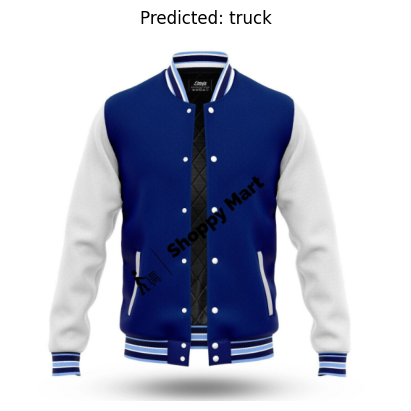

The image is predicted to be a: truck


In [62]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("cifar10_model.h5")

# Compile the model
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# Add softmax layer for prediction
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

# Define the class names
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]


# Function to load and preprocess an external image
def load_and_preprocess_image(img_path, target_size=(32, 32)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image to [0, 1] range
    return img_array


# Function to predict and display a single image
def predict_and_display_image(img_path):
    img_array = load_and_preprocess_image(img_path)

    # Predict the class of the image
    predictions = probability_model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    predicted_label = class_names[predicted_class]

    # Display the image and prediction
    plt.figure()
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()
    print(f"The image is predicted to be a: {predicted_label}")


# Predict and display a single image
img_path = "image.png"  # Replace with the actual image path
predict_and_display_image(img_path)